In [1]:
import os
import numpy as np
import pandas as pd
import numpy.linalg as LA

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm

In [4]:
tqdm.pandas()

In [5]:
pj = os.path.join


set *root* to your root folder where the csv file is
csv file can be downloaded from https://www.federalreserve.gov/data/nominal-yield-curve.htm


In [18]:
root = '/Users/mauriciobarba/repos/crypto-pca'

In [80]:
crypto_files = {i[:-10]: pd.read_csv(pj(root, 'crypto-data', i)) for i in os.listdir(pj(root,'crypto-data')) if i.endswith('.csv')}
equity_files = {i[:-4]: pd.read_csv(pj(root, 'equity-data', i)) for i in os.listdir(pj(root,'equity-data')) if i.endswith('.csv')}


In [92]:
crypto_data = {}
for i in crypto_files:
    crypto_data[i] = crypto_files[i]['Price ($)']

equity_data = {}
for i in equity_files:
    equity_data[i] = equity_files[i]['Close']
crypto_df = pd.DataFrame(crypto_data)
equity_df = pd.DataFrame(equity_data)
crypto_df = crypto_df.pct_change().drop(0, axis=0)
equity_df = equity_df.pct_change().drop(0, axis=0)

print(crypto_df)

          SOL       UNI      LUNA      AVAX       ADA       BTC       DOT  \
1   -0.025510 -0.023256 -0.031250 -0.016432  0.000000  0.013767  0.021127   
2   -0.062827 -0.057823  0.000000 -0.014320  0.000000 -0.006458 -0.004598   
3   -0.061453 -0.021661 -0.032258  0.004843 -0.090909  0.003024  0.083141   
4    0.023810  0.040590  0.033333 -0.004819  0.000000  0.045510 -0.002132   
5   -0.116279 -0.053191  0.000000 -0.014528  0.000000 -0.027256 -0.068376   
..        ...       ...       ...       ...       ...       ...       ...   
360 -0.015514 -0.019646 -0.012962 -0.014215 -0.013889  0.007051 -0.023499   
361 -0.006291  0.023969  0.055882  0.027578 -0.004695  0.040306  0.006806   
362  0.122834  0.000000  0.132575  0.048939  0.033019  0.026657  0.075567   
363  0.076651  0.003070 -0.041822  0.026756 -0.018265 -0.055806 -0.034792   
364  0.046387 -0.015302  0.000000  0.069870  0.009302 -0.024173  0.017907   

          ETH       BNB      DOGE  
1    0.007508 -0.001307       NaN  
2  

In [99]:
crypto_cov = crypto_df.cov()
equity_cov = equity_df.cov()

print(crypto_cov)
print(equity_cov)

           SOL       UNI      LUNA      AVAX       ADA       BTC       DOT  \
SOL   0.007996  0.002405  0.004206  0.003373  0.002233  0.001246  0.002735   
UNI   0.002405  0.006644  0.003274  0.002912  0.002823  0.001651  0.003800   
LUNA  0.004206  0.003274  0.011194  0.004269  0.002873  0.002223  0.003794   
AVAX  0.003373  0.002912  0.004269  0.009073  0.003844  0.001677  0.003777   
ADA   0.002233  0.002823  0.002873  0.003844  0.004996  0.001587  0.003181   
BTC   0.001246  0.001651  0.002223  0.001677  0.001587  0.001793  0.002064   
DOT   0.002735  0.003800  0.003794  0.003777  0.003181  0.002064  0.006237   
ETH   0.002360  0.002816  0.002842  0.002414  0.002378  0.001743  0.003027   
BNB   0.003121  0.002483  0.003300  0.003397  0.002597  0.001857  0.003116   
DOGE  0.001871  0.001286  0.003948  0.002981  0.002432  0.001994  0.002932   

           ETH       BNB      DOGE  
SOL   0.002360  0.003121  0.001871  
UNI   0.002816  0.002483  0.001286  
LUNA  0.002842  0.003300  0.00

In [100]:
def eigenvectors(cov, n_factors=3):
    eigvectors = LA.eig(cov)[1]
    dfout = pd.DataFrame(index=cov.index, columns=pd.RangeIndex(0,eigvectors.shape[1],name='factor'), data=eigvectors)
    return dfout    

def eigenvalues(cov, n_factors=3):
    eigvalues = LA.eigvals(cov)
    dfout = pd.DataFrame(index=pd.RangeIndex(0,eigvalues.shape[0],name='factor'), data=eigvalues).transpose()
    return dfout

In [108]:
crypto_loadings = eigenvectors(crypto_cov)
print(crypto_loadings)

equity_loadings = eigenvectors(equity_cov)
print(equity_loadings)

factor         0         1         2         3         4         5         6  \
SOL    -0.240152 -0.255059 -0.297506 -0.491326 -0.663059  0.306551 -0.078071   
UNI    -0.216742 -0.255905  0.279633  0.504711 -0.181732  0.427704 -0.067246   
LUNA   -0.352435 -0.275566 -0.768100  0.268421  0.357923 -0.038940  0.043280   
AVAX   -0.302074 -0.270423  0.275813 -0.559997  0.564214  0.198831  0.004927   
ADA    -0.224568 -0.186987  0.276286 -0.004922  0.103823 -0.002728 -0.017674   
BTC    -0.142571 -0.089428  0.050548  0.120907 -0.018310 -0.167484 -0.800469   
DOT    -0.271209 -0.226243  0.250322  0.259473 -0.057129 -0.023956  0.004357   
ETH    -0.198111 -0.153675  0.111285  0.151590 -0.141059 -0.060582  0.585833   
BNB    -0.223838 -0.233994  0.113560 -0.114614 -0.211829 -0.805907  0.056130   
DOGE   -0.668003  0.740186  0.020389 -0.011558 -0.041625  0.016055  0.007289   

factor         7         8         9  
SOL    -0.025307  0.082891 -0.011561  
UNI    -0.123439 -0.562899 -0.045117  
LU

In [114]:
crypto_eigs = eigenvalues(crypto_cov)
print(crypto_eigs/crypto_eigs.sum(axis=1)[0])

equity_eigs = eigenvalues(equity_cov)
print(equity_eigs/equity_eigs.sum(axis=1)[0])

factor         0         1         2         3         4         5         6  \
0       0.428012  0.256222  0.078176  0.063066  0.059142  0.041173  0.006113   

factor         7         8         9  
0       0.013712  0.028228  0.026156  
factor         0         1         2         3         4         5         6  \
0       0.485771  0.187151  0.118765  0.068262  0.010052  0.012536  0.038126   

factor         7         8         9  
0       0.023733  0.025967  0.029636  


In [23]:
pcs = np.array(list(range(5)))

In [24]:
norm_loadings = loadings[pcs]
norm_loadingsT = norm_loadings.stack().unstack(level='tenor')
sign = np.sign(norm_loadingsT[range(20,31)].sum(axis=1))

norm_loadingsT = norm_loadingsT.multiply(sign, axis=0)
norm_loadings = norm_loadingsT.stack().unstack(level='factor')

In [25]:
var_explained = eigenvalues.apply(lambda x: x/x.sum(), axis=1)

Text(0.5, 1.0, 'Variance explained of first 3 factors')

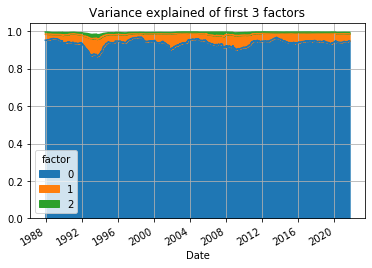

In [26]:
var_explained[range(3)].plot.area()
plt.grid(True)
plt.title('Variance explained of first 3 factors')

In [27]:
pc_start_date = norm_loadings.iloc[0].name[0]
pc_start_date = pd.Timestamp('20000101')

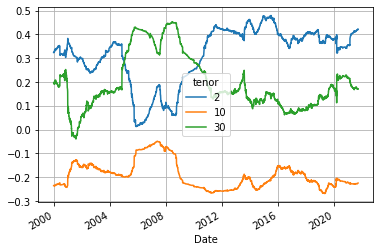

In [28]:
norm_loadingsT[pc_start_date:].xs(2, level='factor')[[2,10,30]].plot()
plt.grid(True)

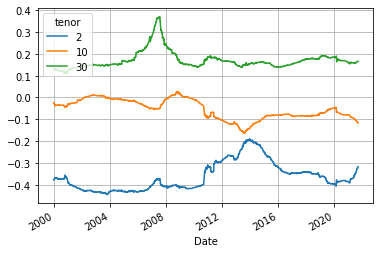

In [29]:
norm_loadingsT[pc_start_date:].xs(1, level='factor')[[2,10,30]].plot()
plt.grid(True)

Text(0.5, 1.0, 'PC1 loadings stability')

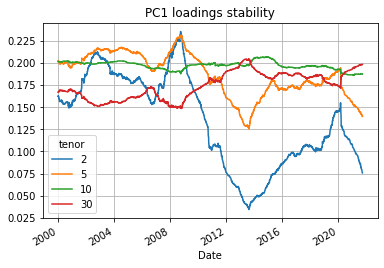

In [30]:
norm_loadingsT[pc_start_date:].xs(0, level='factor')[[2,5,10,30]].plot()
plt.grid(True)
plt.title('PC1 loadings stability')

Text(0, 0.5, 'Maturity(y)')

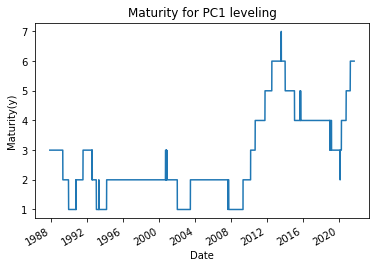

In [31]:
norm_loadingsT.xs(0, level='factor').apply(lambda x: x.index[np.argmax(x>0.15)], axis=1).plot()
plt.title("Maturity for PC1 leveling")
plt.ylabel('Maturity(y)')


Text(0, 0.5, 'Maturity(y)')

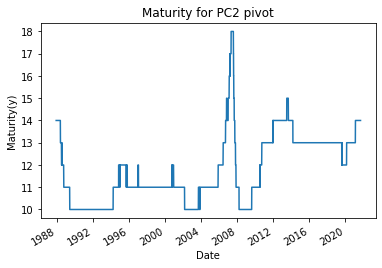

In [32]:
norm_loadingsT.xs(1, level='factor').apply(lambda x: x.index[np.argmax(x>0)], axis=1).plot()
plt.title("Maturity for PC2 pivot")
plt.ylabel('Maturity(y)')

In [33]:
belly=pd.DataFrame()
belly['bottom'] = norm_loadingsT.xs(2, level='factor').apply(lambda x: x.index[np.argmax(-x)], axis=1)
belly['start'] = norm_loadingsT.xs(2, level='factor').apply(lambda x: x.index[np.argmax(x<0)], axis=1)
belly['end'] = norm_loadingsT.xs(2, level='factor').apply(lambda x: x.index[x.size-1-np.argmax(np.flip(x)<0)], axis=1)

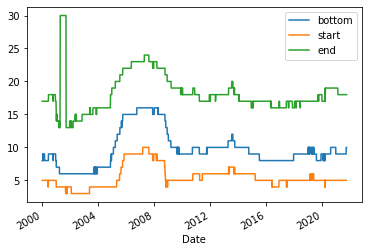

In [34]:
belly[pc_start_date:].plot()


In [35]:
dr=pd.DataFrame(index=(pd.date_range(pc_start_date, periods=5, freq='5Y') + pd.offsets.Day(10)).rename('Date'))

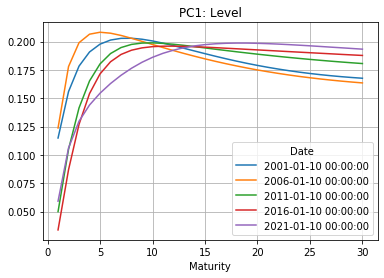

In [36]:
pd.merge_asof(dr, norm_loadingsT.xs(0, level='factor'), left_index=True, right_index=True).transpose().plot()
plt.grid(True)
plt.xlabel('Maturity')
plt.title(f'PC1: Level');

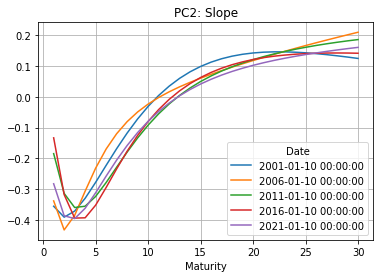

In [37]:
pd.merge_asof(dr, norm_loadingsT.xs(1, level='factor'), left_index=True, right_index=True).transpose().plot()
plt.grid(True)
plt.xlabel('Maturity')
plt.title(f'PC2: Slope');

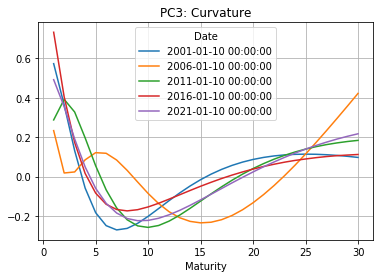

In [38]:
pd.merge_asof(dr, norm_loadingsT.xs(2, level='factor'), left_index=True, right_index=True).transpose().plot()
plt.grid(True)
plt.xlabel('Maturity')
plt.title(f'PC3: Curvature');

In [39]:
max_date = lead_deltay[pc_start_date:].dropna().iloc[-1].name

In [40]:
factor_lead_moves = pd.concat([(lead_deltay[pc_start_date:].dropna() * norm_loadingsT[pc_start_date:max_date].xs(i, level='factor')).sum(axis=1) for i in range(5)], keys=range(5), axis=1)

In [41]:
factor_lead_moves[[0,1,2]].corr()*100

,0,1,2
0,100.000000,11.832446,-3.533462
1,11.832446,100.000000,-4.590840
2,-3.533462,-4.590840,100.000000


In [42]:
tenors = norm_loadingsT.columns
pc_component_moves = pd.concat([(factor_lead_moves * norm_loadings[pc_start_date:max_date].xs(i, level='tenor')) for i in tenors], keys=tenors, axis=0)

In [43]:
lead_deltay.columns.rename('tenor', inplace=True)

In [44]:
x0=lead_deltay[pc_start_date:].stack()
pc_residuals = pc_component_moves.swaplevel(i=0, j=1).cumsum(axis=1).sort_index().transform(lambda x: x0-x)

In [45]:
resid = pc_residuals[0].unstack(level='tenor')
resid_zscore = (resid - resid.ewm(halflife=10).mean())/resid.ewm(halflife=10).std()

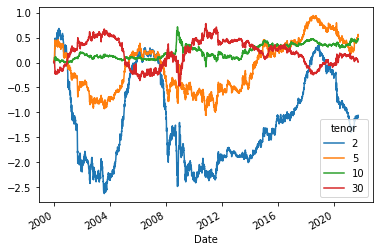

In [46]:
resid.cumsum()[[2,5,10,30]].plot()

## Out of sample variance

In [47]:
df_loadings=norm_loadings[pc_start_date:]

In [48]:
def out_of_sample_var_explain(df, shift_size, factors=None):

    if factors is None:
        factors = df.columns
    nfactors = len(factors)
    factor_list = list(range(nfactors))
    df_shifted = df.unstack().shift(shift_size).stack().dropna()
    start_date = df_shifted.unstack().index[0]
    D=df[start_date:].groupby('Date').apply(lambda x: df_shifted.loc[x.name, factor_list].transpose() @ x.reset_index(level=0, drop=True))


    DLD = D.groupby('Date').apply(lambda x: pd.Series(np.diag(x @ np.diag(eigenvalues.loc[x.name, pcs]) @ x.to_numpy().T)))

    percent_explained=DLD.div(eigenvalues.loc[DLD.index].sum(axis=1), axis=0)
    return percent_explained

In [49]:
shift_sizes = [0,30,60,180,252,504]

OSV = out_of_sample_var_explain(df_loadings, 504)

In [50]:
OSV0 = out_of_sample_var_explain(df_loadings, 0)

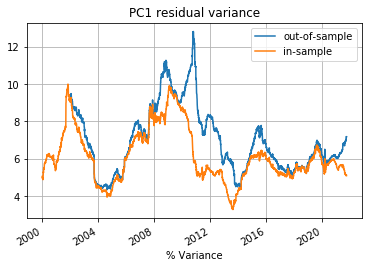

In [51]:

ax=((1-OSV[0])*100).plot(label='out-of-sample')
((1-OSV0[0])*100).plot(ax=ax, label='in-sample')
ax.legend()
ax.set_title('PC1 residual variance')
ax.set_xlabel('% Variance')
ax.grid(True)

In [52]:
tenors = [2,5,10]
df = df_loadings[[0,1]].reset_index(level=0)

In [54]:
def neutral_weights(df):
    tenors = df.index
    #import pdb; pdb.set_trace()
    df1=df.drop(columns='Date')
    w=df1.loc[tenors[1:]].to_numpy().T
    b=-df1.loc[tenors[0]].to_numpy()
    res = np.linalg.solve(w, b)
    dfout=pd.DataFrame(index=tenors)
    weights = np.concatenate(([1],res))
    return pd.Series(index=tenors, data=weights/weights[1])
    
def neutral_weights_tenors(df, tenors):
    return df.loc[tenors].groupby('Date', group_keys=True).progress_apply(neutral_weights)

In [55]:
tenors=[5,7,10]
weights = neutral_weights_tenors(df, tenors)

100%|██████████| 5438/5438 [00:14<00:00, 386.37it/s]


In [56]:
pc_neutral_return = weights * lead_deltay.loc[weights.index, weights.columns]

In [57]:
pc_neutral_return_agg = pc_neutral_return.sum(axis=1)

In [58]:
pc_neutral_return_agg_lag = pc_neutral_return_agg.shift(1).cumsum()

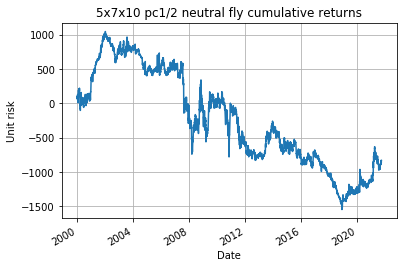

In [59]:
(pc_neutral_return_agg.cumsum()*1e4).plot()
plt.title('5x7x10 pc1/2 neutral fly cumulative returns')
plt.ylabel('Unit risk')
plt.grid(True)

In [60]:
signal = (pc_neutral_return_agg_lag - pc_neutral_return_agg_lag.ewm(halflife=100).mean())/ pc_neutral_return_agg_lag.ewm(halflife=60).std()

In [61]:
retagg = pc_neutral_return_agg.cumsum()
signal_contemp = (retagg - retagg.ewm(halflife=100).mean())/ retagg.ewm(halflife=60).std()

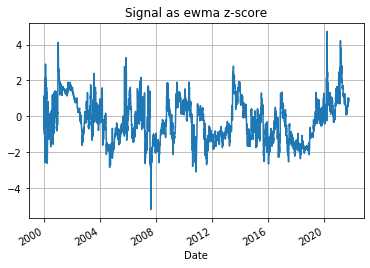

In [62]:
signal.plot()
plt.title('Signal as ewma z-score')
plt.grid()

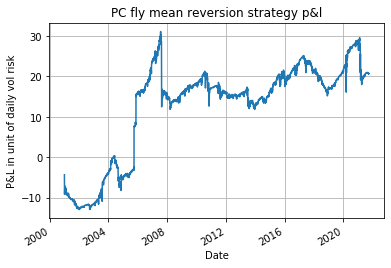

In [63]:
strategy_return = (-signal * pc_neutral_return_agg / pc_neutral_return_agg_lag.ewm(halflife=60).std() )
strategy_return['20010101':].cumsum().plot()
plt.title('PC fly mean reversion strategy p&l')
plt.ylabel('P&L in unit of daily vol risk')
plt.grid(True)

In [64]:
df=strategy_return['20010101':]
sharpe=(df.mean())/df.std()*np.sqrt(252)
sharpe

0.15718263104312505

The plot below is for a strategy where the signal is not delayed by 1 day.  In general this produces unrealistic returns in mean reversion strategies

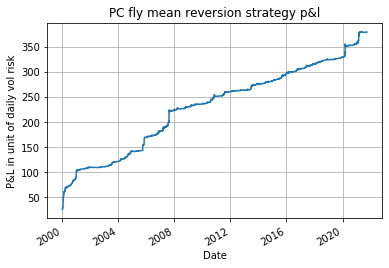

In [65]:
(signal_contemp * pc_neutral_return_agg / pc_neutral_return_agg_lag.ewm(halflife=60).std() ).cumsum().plot()
plt.title('PC fly mean reversion strategy p&l')
plt.ylabel('P&L in unit of daily vol risk')
plt.grid(True)